In [ ]:
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from skimage.feature import hog
import numpy as np
import cv2
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

USE HOG + SVM TO CLASSIFICATE

In [2]:
dir_train = 'DogCatDataset/training_set/training_set/'
dir_test = 'DogCatDataset/test_set/test_set/'

100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:07<00:00, 513.13it/s]


Shape of X_train_shape, display the first sample of X_train_shape  (8000, 3) [499 327   3]
Mean of height images:  360.472
Mean of weigh images:  403.801


<AxesSubplot:ylabel='Count'>

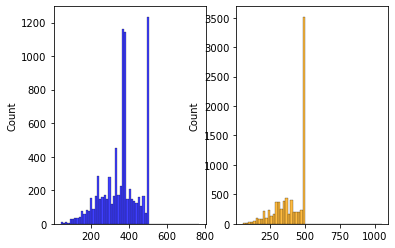

In [3]:
X_train_shape = []

for i in tqdm(range(1, 4001)):
    img = cv2.imread(dir_train + 'dogs/dog.'+str(i)+'.jpg')
    X_train_shape.append(img.shape)
    
for i in tqdm(range(1, 4001)):
    img = cv2.imread(dir_train + 'cats/cat.'+str(i)+'.jpg')
    X_train_shape.append(img.shape)

X_train_shape = np.asarray(X_train_shape)
print('Shape of X_train_shape, display the first sample of X_train_shape ',X_train_shape.shape, X_train_shape[0])

print('Mean of height images: ', np.mean(X_train_shape[:, 0]))
plt.subplot(1, 2, 1)
sns.histplot(X_train_shape[:, 0], color= 'blue')

print('Mean of weigh images: ', np.mean(X_train_shape[:, 1]))
plt.subplot(1, 2, 2)
sns.histplot(X_train_shape[:, 1], color= 'orange')

In [4]:
# 0 is dog, 1 is cat
X_train, y_train = [], []

for i in tqdm(range(1, 4001)):
    img = cv2.imread(dir_train + 'dogs/dog.'+str(i)+'.jpg')
    img = cv2.resize(img, (400, 360))
    X_train.append(img)
    y_train.append(0)
    
    
for i in tqdm(range(1, 4001)):
    img = cv2.imread(dir_train + 'cats/cat.'+str(i)+'.jpg')
    img = cv2.resize(img, (400, 360))
    X_train.append(img)
    y_train.append(1)
    
X_train = np.asarray(X_train)
print('Shape of images afer resize (height = 360, weigh = 400)',X_train.shape)

100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:08<00:00, 454.39it/s]


Shape of images afer resize (height = 360, weigh = 400) (8000, 360, 400, 3)


In [5]:
X_ExtractFeature = []
for i in tqdm(X_train):
    tmp = hog(i, orientations= 9, pixels_per_cell= (40, 40), cells_per_block= (1, 1), multichannel= True )
    X_ExtractFeature.append(tmp)
X_ExtractFeature = np.asarray(X_ExtractFeature)
print('Shape of X_train after using hog',X_ExtractFeature.shape)

100%|██████████████████████████████████████████████████████████████████████████████| 8000/8000 [05:35<00:00, 23.87it/s]

Shape of X_train after using hog (8000, 810)


In [7]:
# 0 is dog, 1 is cat
X_test, y_test = [], []

for i in tqdm(range(4001, 5001)):
    img = cv2.imread(dir_test + 'dogs/dog.'+str(i)+'.jpg')
    img = cv2.resize(img, (400, 360))
    X_test.append(img)
    y_test.append(0)
    
    
for i in tqdm(range(4001, 5001)):
    img = cv2.imread(dir_test + 'cats/cat.'+str(i)+'.jpg')
    img = cv2.resize(img, (400, 360))
    X_test.append(img)
    y_test.append(1)
    
X_test, y_test = np.asarray(X_test), np.asarray(y_test)
print('Shape of images afer resize (height = 360, weigh = 400), y_test',X_test.shape, )

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.05it/s]


Shape of images afer resize (height = 360, weigh = 400), y_test (2000, 360, 400, 3)


In [8]:
X_ExtractFeature_test = []
for i in tqdm(X_test):
    tmp = hog(i, orientations= 9, pixels_per_cell= (40, 40), cells_per_block= (1, 1), multichannel= True )
    X_ExtractFeature_test.append(tmp)
X_ExtractFeature_test = np.asarray(X_ExtractFeature_test)
print('Shape of X_train after using hog',X_ExtractFeature_test.shape)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:28<00:00, 22.66it/s]

Shape of X_train after using hog (2000, 810)


In [9]:
model = SVC()
model.fit(X_ExtractFeature, y_train)

SVC()

In [10]:
y_pre = model.predict(X_ExtractFeature_test)
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.72      0.72      0.72      1000

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000

